## ``FuncAnimation`` animacion con mathplotlib

``matplotlib.animation.FuncAnimation(fig, frames=None, init_func=None, fargs=None, interval)``

Entradas relevantes:
- ``fig``: La representación que queremos animar.
+ ``func``: Una función que actualice nuestros datos.(``func(frame, *fargs)``)
* ``frames``: Número total de fotogramas.
* ``init_func``: Gráfico(plot) inicial.
+ ``fargs``: Argumentos adicionales de la función.
- ``interval``: Retraso entre  cada fotograma en [ms]

(Opcional):
- ``blit``-> Bool: Optimizacion del dibujo. 

Métodos:
* ``pause()``:  Pausar la animación.
* ``resume()``: Reanudar la animación.
* ``save()``:   Guarda la  animación.

La estructura base para usar esta función es la siguiente:

C:\Windows\Temp\ipykernel_9284\1724192577.py:23: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, update,) # El resto de argumentos


Error in callback <function _draw_all_if_interactive at 0x0000015398D6FBA0> (for post_execute), with arguments args (),kwargs {}:


ValueError: not enough values to unpack (expected 2, got 0)

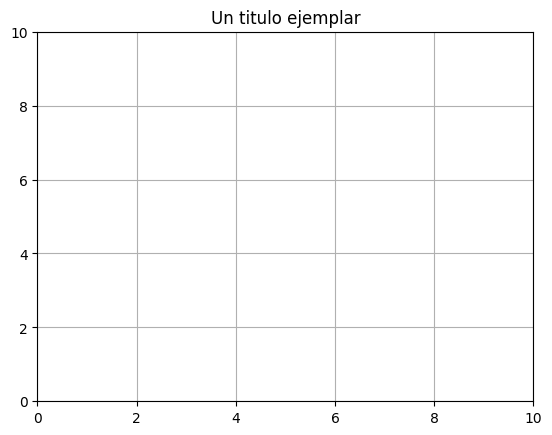

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#----Definir nuestros datos aquí----#

#----Crear una representación y eje con configuracioones aditionales y estilo del grafico----#

fig, axis = plt.subplots()
animated_plot, = axis.plot([], []) # la ',' se usa porque axis.plot devuelve un array

axis.set_xlim([0, 10])
axis.set_ylim([0, 10])
axis.set_title("Un titulo ejemplar")

plt.grid()

def update(frame):
    animated_plot.set_data() # Actualización a lo largo de los datos [fotograma-frame]

    return animated_plot,

animation = FuncAnimation(fig, update,) # El resto de argumentos

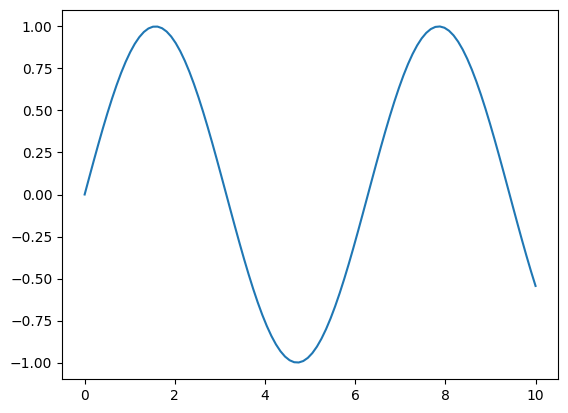

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#----Definir nuestros datos aquí----#
t = np.linspace(0, 10, 100)
y = np.sin(t)
#----Crear una representación y eje con configuracioones aditionales y estilo del grafico----#

fig, axis = plt.subplots()

axis.plot(t, y)

plt.show()

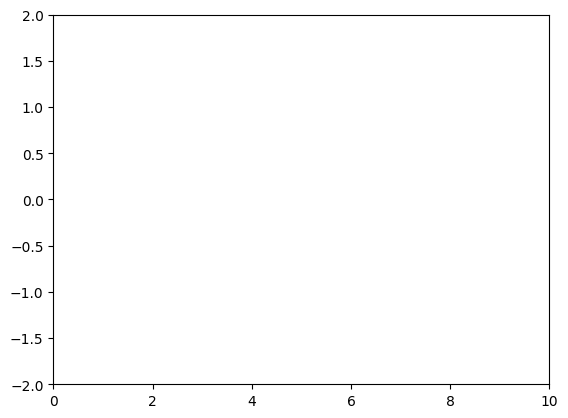

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#----Definir nuestros datos aquí----#
t = np.linspace(0, 10, 100)
y = np.sin(t)
#----Crear una representación y eje con configuracioones aditionales y estilo del grafico----#

fig, axis = plt.subplots()

axis.set_xlim([min(t), max(t)])
axis.set_ylim([-2, 2])

animated_plot, = axis.plot([], [])

def update_data(frame):
    
    animated_plot.set_data(t[:frame], y[:frame])
    
    return animated_plot,

##axis.plot(t, y)
animation = FuncAnimation(
                fig=fig,
                func=update_data,
                frames=len(t),
                interval=25,
                repeat=True,
            )


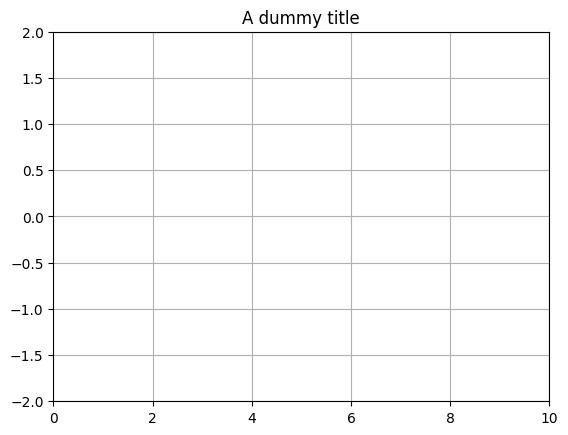

In [4]:
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt


# - - - Defining our data here: - - - #
t = np.linspace(0, 10, 100)
y = np.sin(t)

# - - - Creating a figure and Axis with Additionnal configurations and styling of the plot: - - - #

fig, axis = plt.subplots()
animated_plot, = axis.plot([], []) # ',' is used because axis.plot returns an array

axis.set_xlim([min(t), max(t)])
axis.set_ylim([-2, 2])
axis.set_title("A dummy title")

axis.grid()

# - - - Defining our update function - - - #
    
def update(frame):
    animated_plot.set_data(t[:frame], np.sin(t[:frame])) # Update the data for the sine wave up to frame
    
    return animated_plot,


animation = FuncAnimation(fig=fig,func=update,frames=len(t),interval=25,blit=True)

#animation.save("cool_animation.gif")
plt.show() 

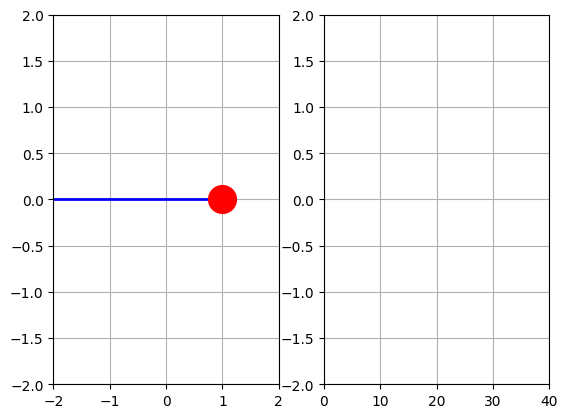

In [5]:
from matplotlib.animation import FuncAnimation
import numpy as np

m = 1 # kg
k = 1 # N/m
d = 0.6 # Unit of d

t = np.linspace(0, 40, 501)
w_d = np.sqrt((4*m*k - d**2)/(4*m**2))
x = np.exp(-d/(2*m) * t) * np.cos(w_d * t)

# - - - Creating a figure and Axis with Additionnal configurations and styling of the plot: - - - #

fig, axis = plt.subplots(1, 2)

animated_spring, = axis[0].plot([], [], color='blue') # ',' is used because axis.plot returns an array
animated_mass, = axis[0].plot([], [], 'o', markersize=20, color='red') # ',' is used because axis.plot returns an array

axis[0].set_xlim([-2, 2])
axis[0].set_ylim([-2, 2])
axis[0].grid()

animated_disp, = axis[1].plot([], [], color='red')

axis[1].set_xlim([min(t), max(t)])
axis[1].set_ylim([-2, 2])
axis[1].grid()

# - - - Defining our update function - - - #

def update(frame):
    animated_mass.set_data([x[frame]], [0]) # Updating the data across [frame]
    animated_spring.set_data([-2, x[frame]], [0, 0]) # Updating the data across [frame]

    animated_spring.set_linewidth(int(abs(x[frame]-2)*2))

    animated_disp.set_data(t[:frame], x[:frame])

    return animated_mass, animated_spring, animated_disp


animation = FuncAnimation(
                    fig=fig,
                    func=update,
                    frames=len(t),
                    interval=25,
                    blit=True,
                ) 

#animation.save("cool_animation.gif")
plt.show() 

In [6]:
from matplotlib.animation import FuncAnimation
from IPython import display

[]

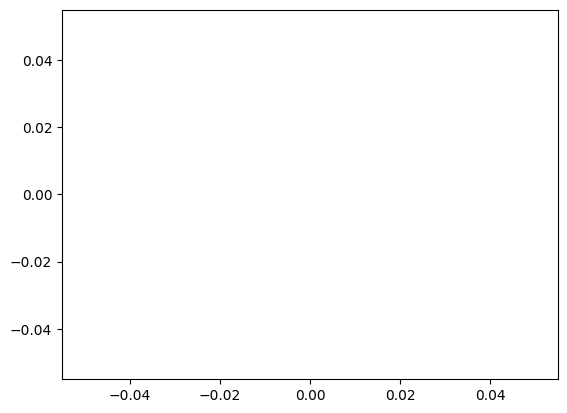

In [7]:
plt.plot()

In [8]:
output = plt.plot([])
plt.close()
print(output[0])

Line2D(_child0)


In [9]:
x= np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
lines = plt.plot([])
line=lines[0]
# other setup
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
def animate(frame):
    # update plot
    y= np.sin(x+2*np.pi * frame/100)
    line.set_data((x,y))
    pass

anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html= display.HTML(video) # Necesita from  IPython import display
display.display(html)
plt.close()

In [ ]:
x= np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
lines = plt.plot([], "o")
line=lines[0]
# other setup
plt.axis("scaled")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
         
def animate(frame):
    # update plot
    x = np.cos(frame/100*2*np.pi)
    y = np.sin(frame/100*2*np.pi)
    line.set_data((x,y))

anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html= display.HTML(video) # Necesita from  IPython import display
display.display(html)
plt.close()

C:\Windows\Temp\ipykernel_9284\3541452333.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data((x,y))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()